In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import imblearn
from imblearn.under_sampling import NearMiss

In [54]:
plt.rcParams['figure.figsize'] = (12,8)

In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [76]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [77]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.000,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,6311409.280,C1529008245,6311409.280,0.000,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,6311409.280,C1162922333,6311409.280,0.000,C1365125890,68488.840,6379898.110,1,0
6362618,743,TRANSFER,850002.520,C1685995037,850002.520,0.000,C2080388513,0.000,0.000,1,0


In [78]:
df.shape

(6362620, 11)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [80]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001,0.000
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036,0.002
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000,1.000


In [81]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [82]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
Data is already clean as far as null and duplicate values are concerned so no data cleaning process is required over here.

In [83]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

In [ ]:
Eliminating the outliers

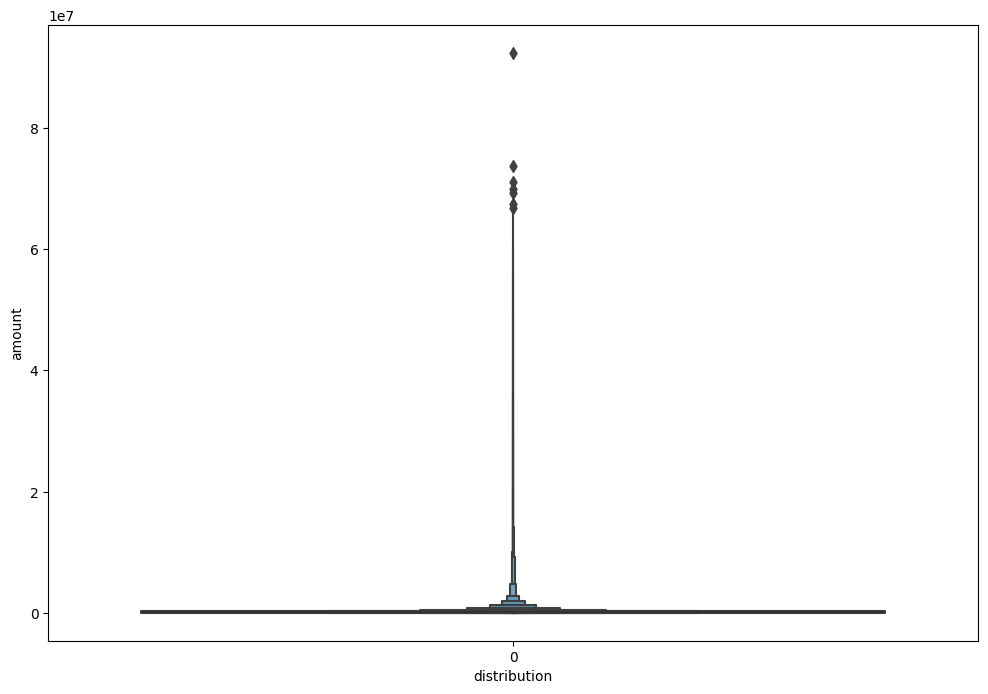

In [84]:
sns.boxenplot(df['amount'])
plt.ylabel('amount')
plt.xlabel('distribution')
plt.show()

Text(0.5, 0, 'distribution')

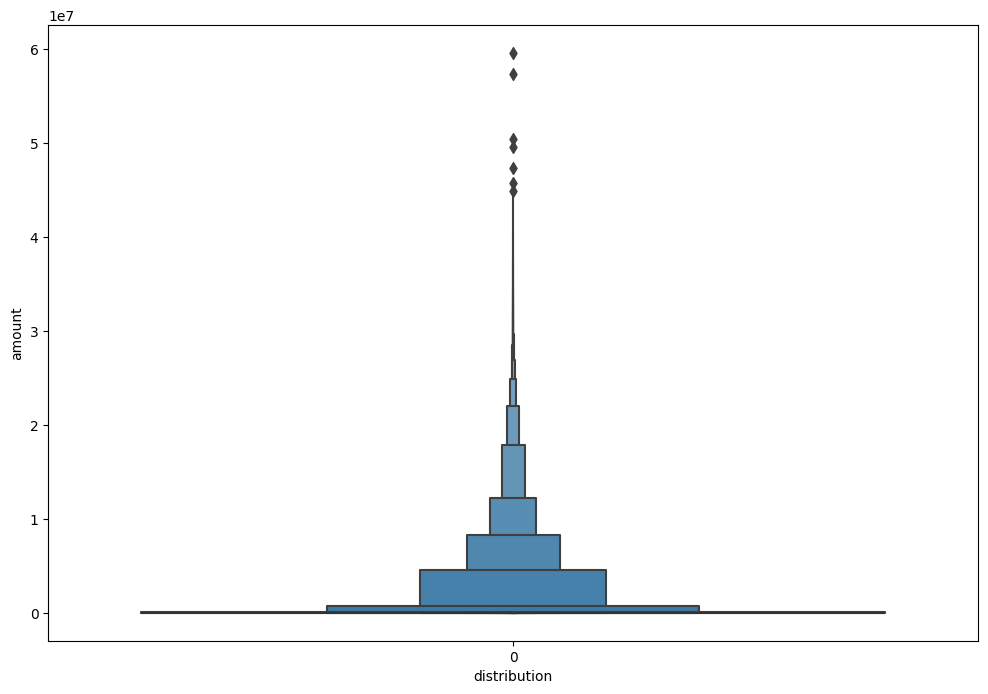

In [85]:
sns.boxenplot(df['oldbalanceOrg'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

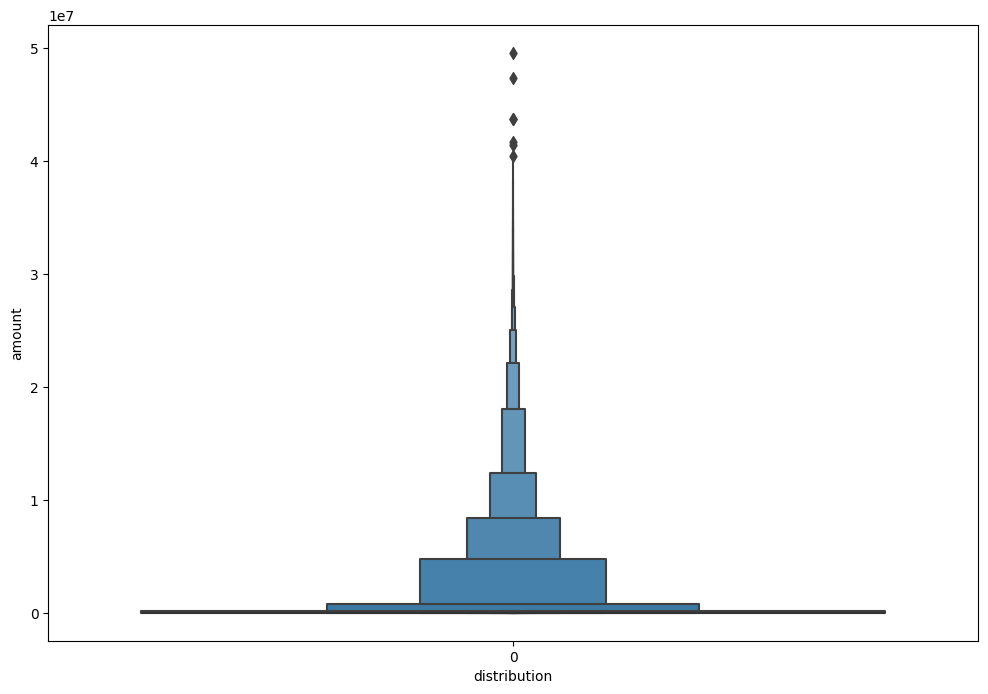

In [86]:
sns.boxenplot(df['newbalanceOrig'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

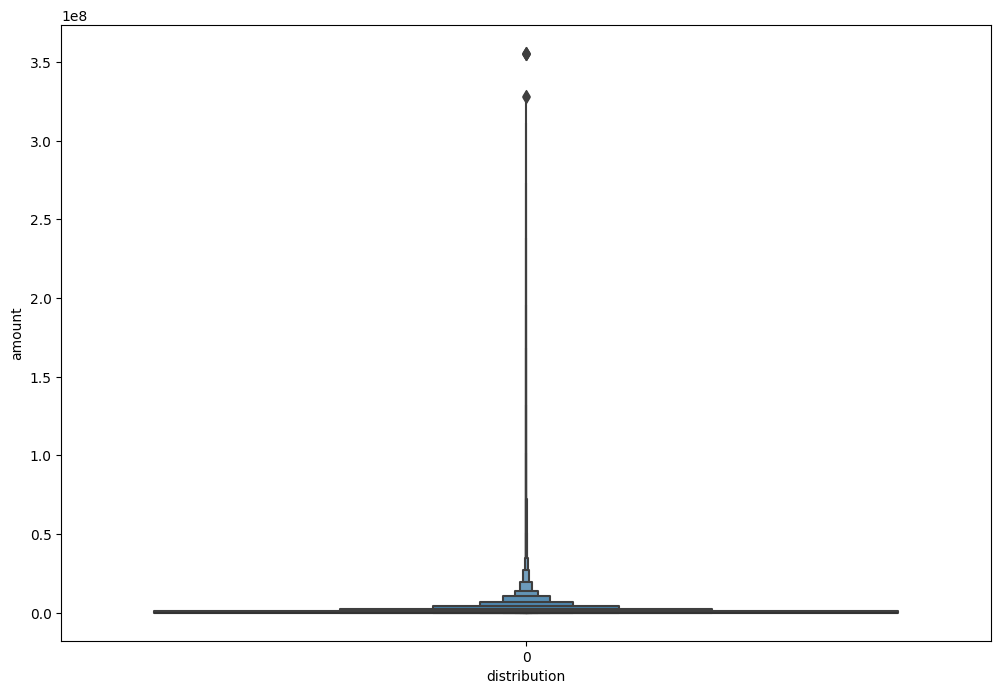

In [87]:
sns.boxenplot(df['oldbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

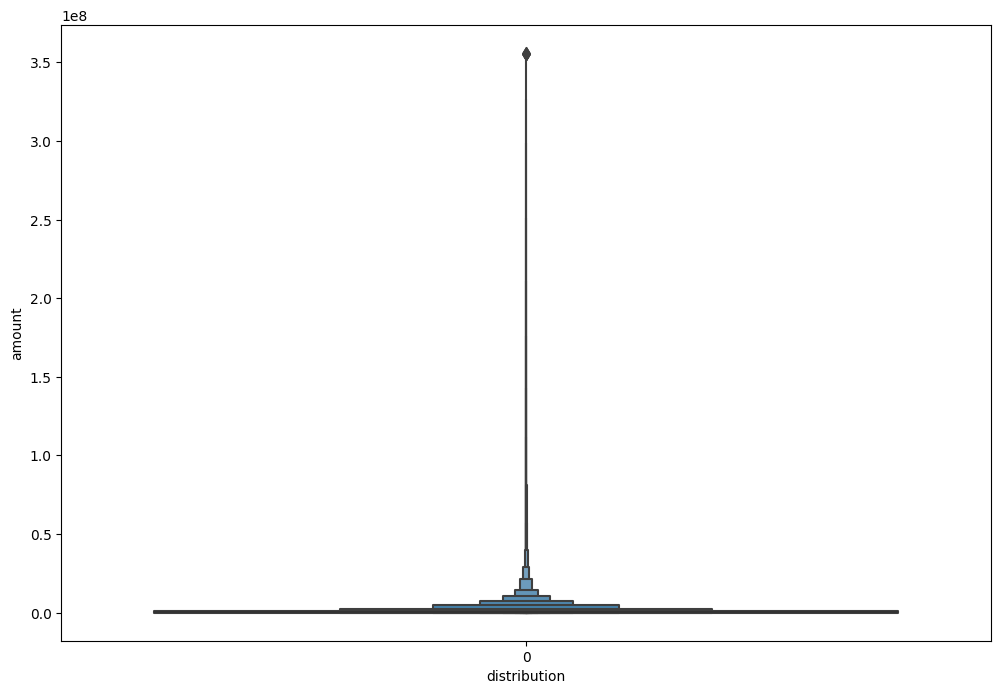

In [88]:
sns.boxenplot(df['newbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

In [89]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [90]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')

In [ ]:
Exploratory Data Analysis

<Axes: >

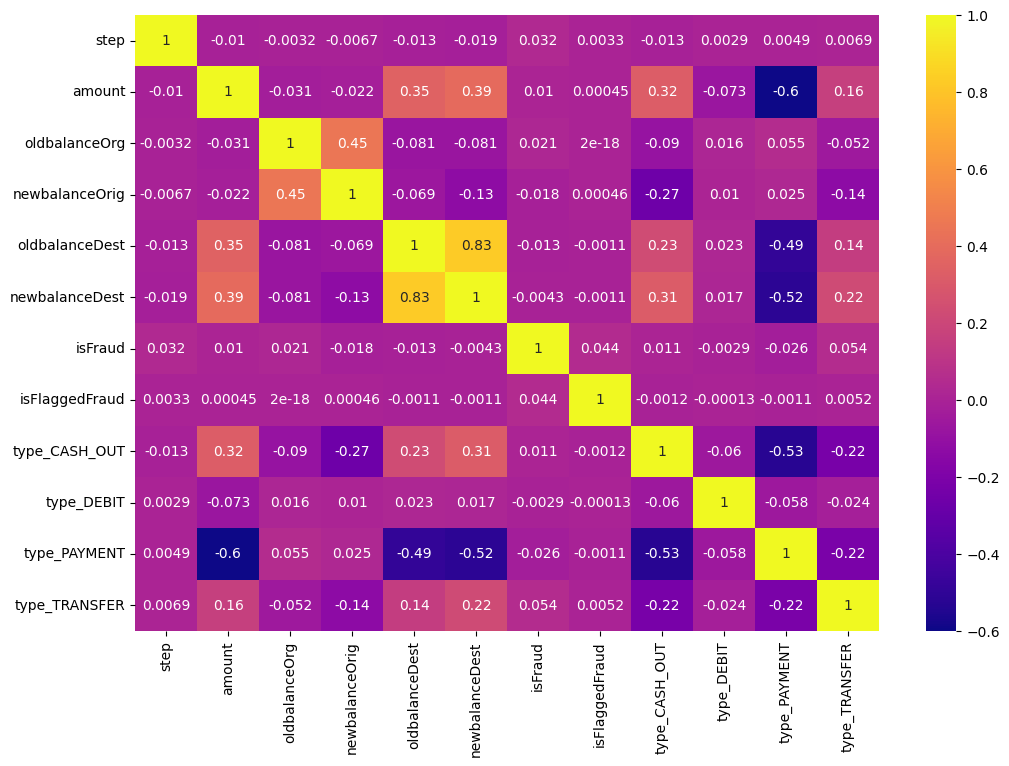

In [157]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [93]:
df.groupby('isFraud').describe().T

isFraud                        0           1
step           count 6354407.000    8213.000
               mean      243.236     368.414
               std       142.140     216.389
               min         1.000       1.000
               25%       156.000     181.000
               50%       239.000     367.000
               75%       334.000     558.000
               max       718.000     743.000
amount         count 6020183.000    4359.000
               mean   111488.796  174214.225
               std    120371.544  139527.583
               min         0.010       0.000
               25%     12359.360   54584.000
               50%     63111.400  139210.230
               75%    182870.775  272791.440
               max    501718.410  501496.310
oldbalanceOrg  count 5246866.000    3247.000
               mean    30618.674  103543.102
               std     53226.540   76607.585
               min         0.000       0.000
               25%         0.000   36300.250
               50%      4214.000   90346.050
               75%     35239.000  161670.615
               max    268287.750  268230.430
newbalanceOrig count 5301171.000    8058.000
               mean    34823.724     169.722
               std     75455.363    7087.570
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%     19689.500       0.000
               max    360645.590  353874.220
oldbalanceDest count 5568738.000    7747.000
               mean   352944.602  159770.036
               std    550248.210  395884.933
               min         0.000       0.000
               25%         0.000       0.000
               50%     19297.910       0.000
               75%    510295.938   68105.975
               max   2357589.180 2350433.080
newbalanceDest count 5616979.000    7114.000
               mean   444017.050  359668.220
               std    652211.824  633851.852
               min         0.000       0.000
               25%         0.000       0.000
               50%    107954.330       0.000
               75%    658917.085  465473.863
               max   2779767.650 2776135.330
isFlaggedFraud count 6354407.000    8213.000
               mean        0.000       0.002
               std         0.000       0.044
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%         0.000       0.000
               max         0.000       1.000

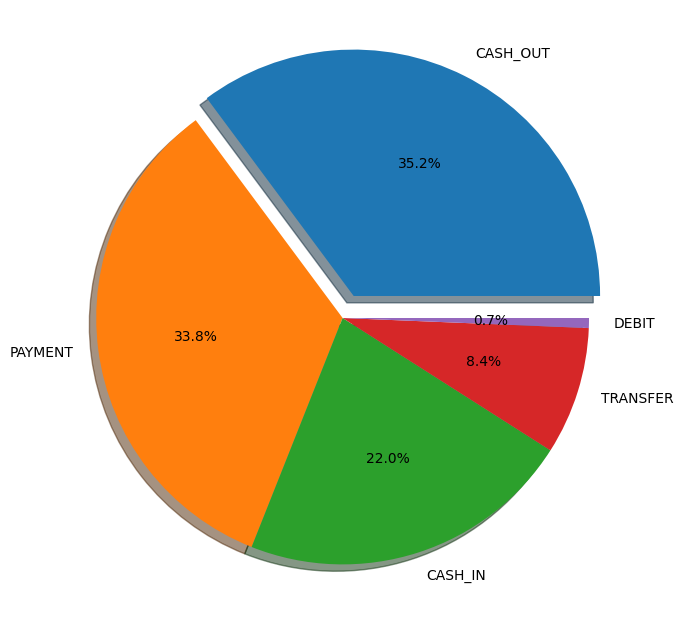

In [94]:
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
A vast majority of the transactions are of the type CASH_OUT having an overall proportion of a little more than one-third, closely followed by Payment mode having a share of nearly 34%. The proportion of CASH_IN transaction stood at just over one-fifth, even though, the percentage of debit and normal transfer transactions had a minimal share of less than one-tenth.

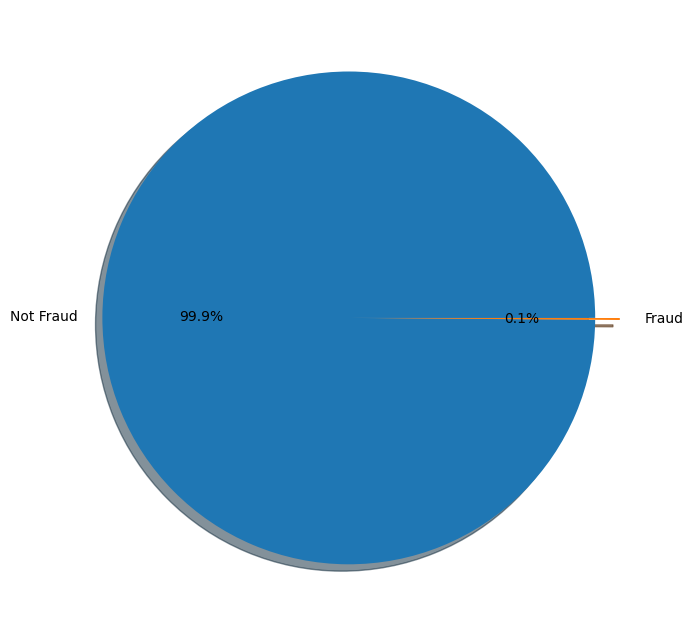

In [95]:
values = df['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

In [ ]:
Just a tiny fraction of the total transactions in the given dataset are fraud which indicates that this is a highly imbalanced dataset

In [ ]:
Let's find out the maximum transferred amount by type.

In [96]:
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,501718.410
1,CASH_IN,501718.020
2,TRANSFER,501709.630
3,DEBIT,417825.070
4,PAYMENT,238637.980


<Axes: xlabel='type', ylabel='amount'>

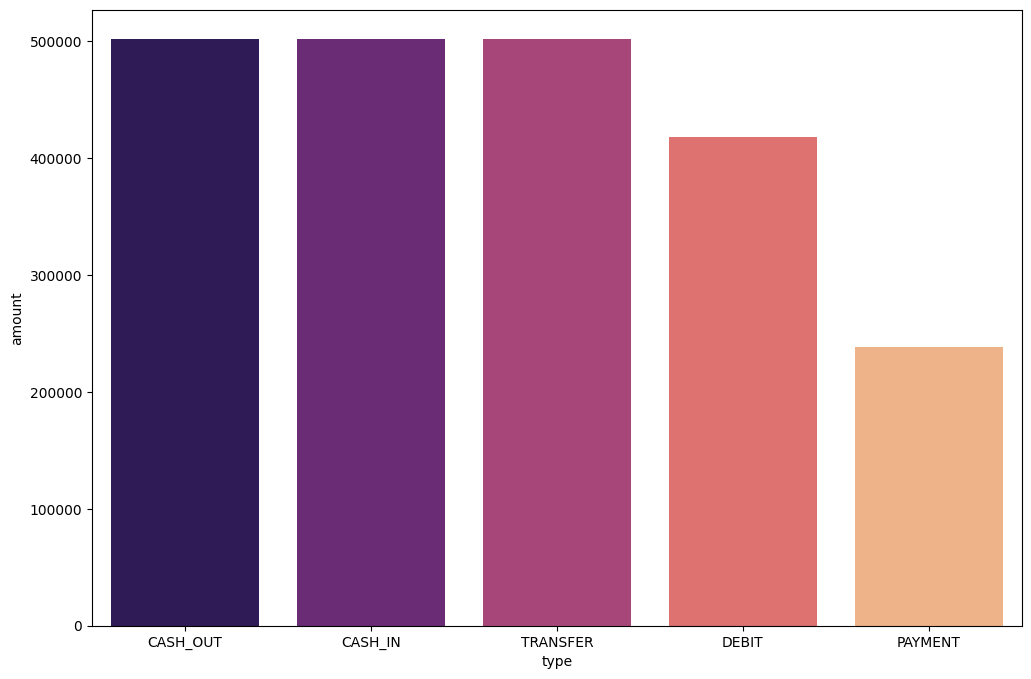

In [97]:
sns.barplot(x='type',y='amount',data=max_amount_type,palette='magma')

In [ ]:
The highest amount was transferred through normal transfer mode while the least money was transferred by payment.

Text(0.5, 0, 'isFraud')

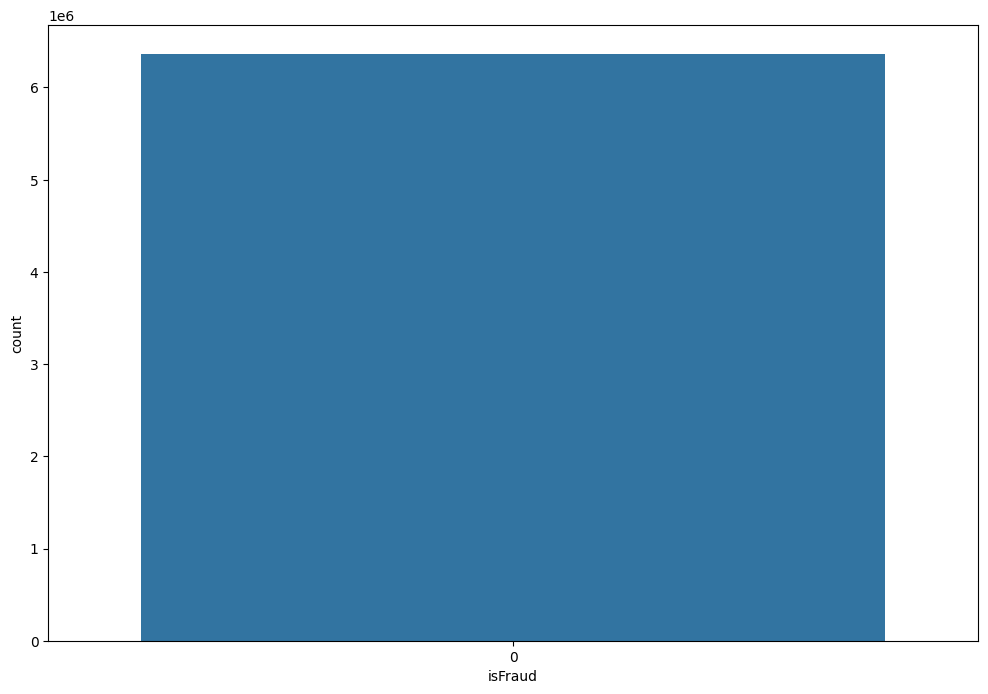

In [99]:
sns.countplot(df['isFraud'])
plt.xlabel('isFraud')

In [ ]:
This is an imbalanced dataset as almost all the samples provided in the dataset belong to the majority class label 'Not Fraud'.

<Axes: xlabel='amount', ylabel='Density'>

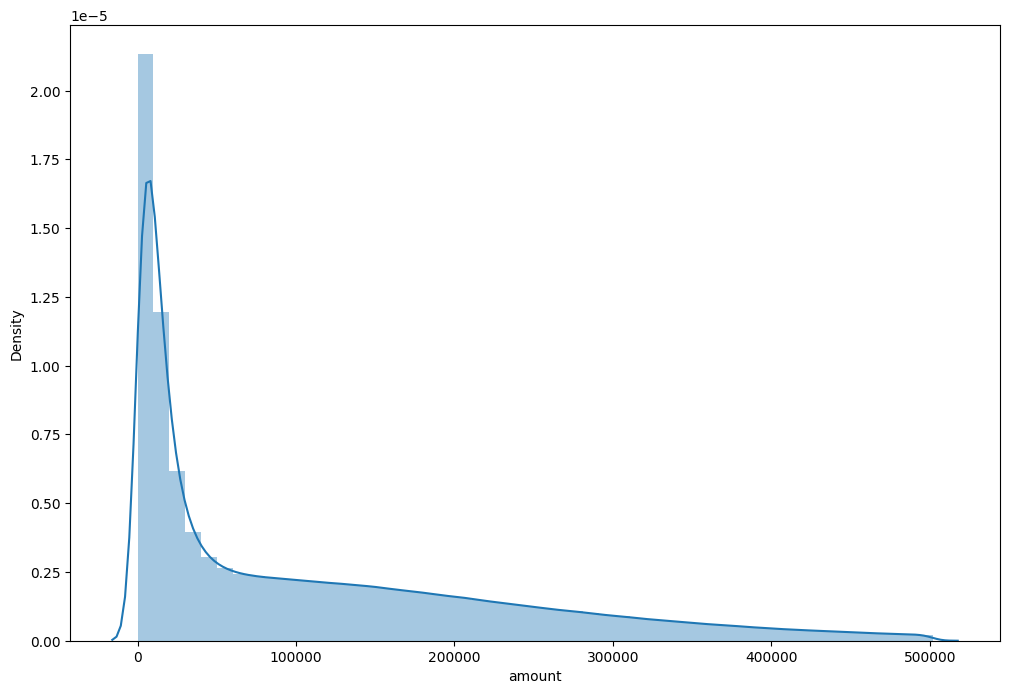

In [100]:
sns.distplot(df['amount'],bins=50)

In [ ]:
All the balances, either old or new, of both the sender as well as the receiver have a positively right skewed distribution so let's perform normalization of each of these variables.

<Axes: xlabel='amount', ylabel='Density'>

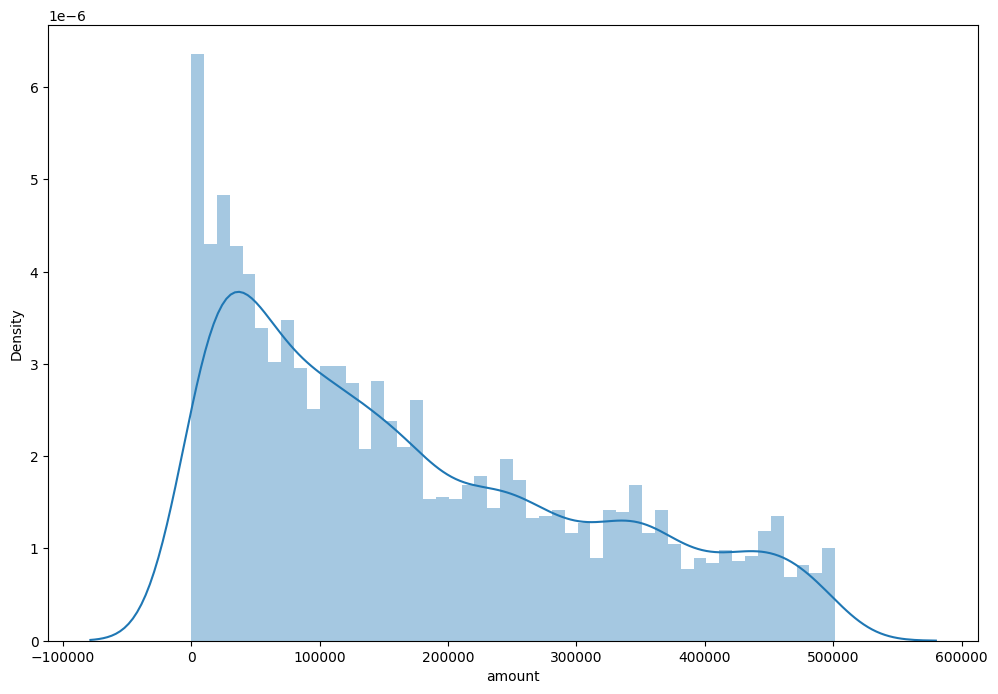

In [101]:
positive_fraud_case = df[df['isFraud']==1]
sns.distplot(positive_fraud_case['amount'],bins=50)

<Axes: xlabel='amount', ylabel='Density'>

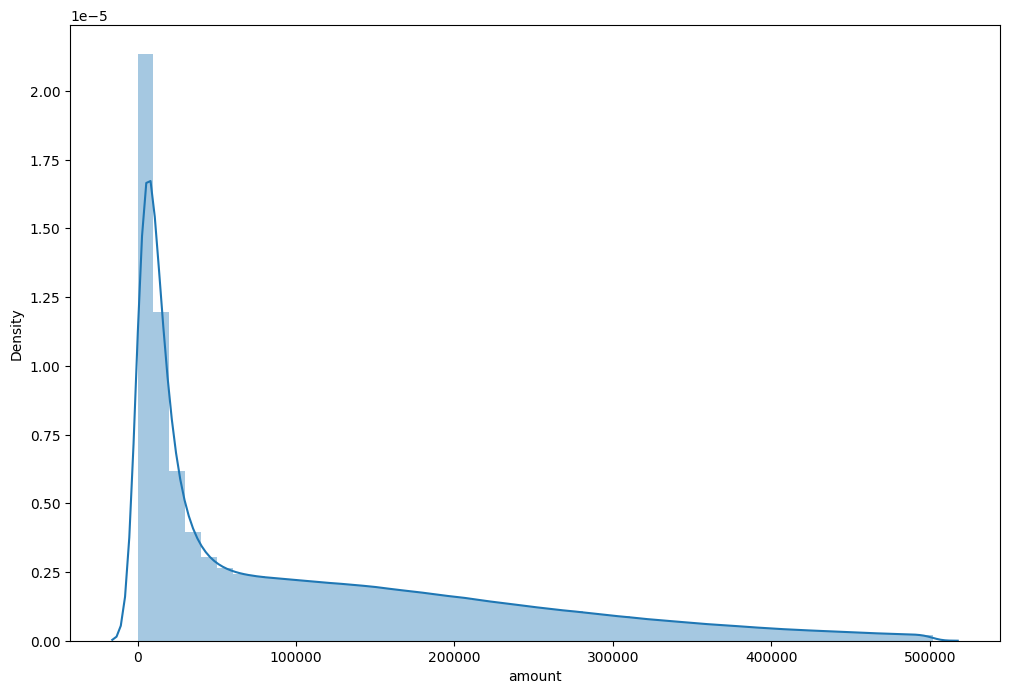

In [102]:
non_fraud_case = df[df['isFraud']==0]
sns.distplot(non_fraud_case['amount'],bins=50)

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

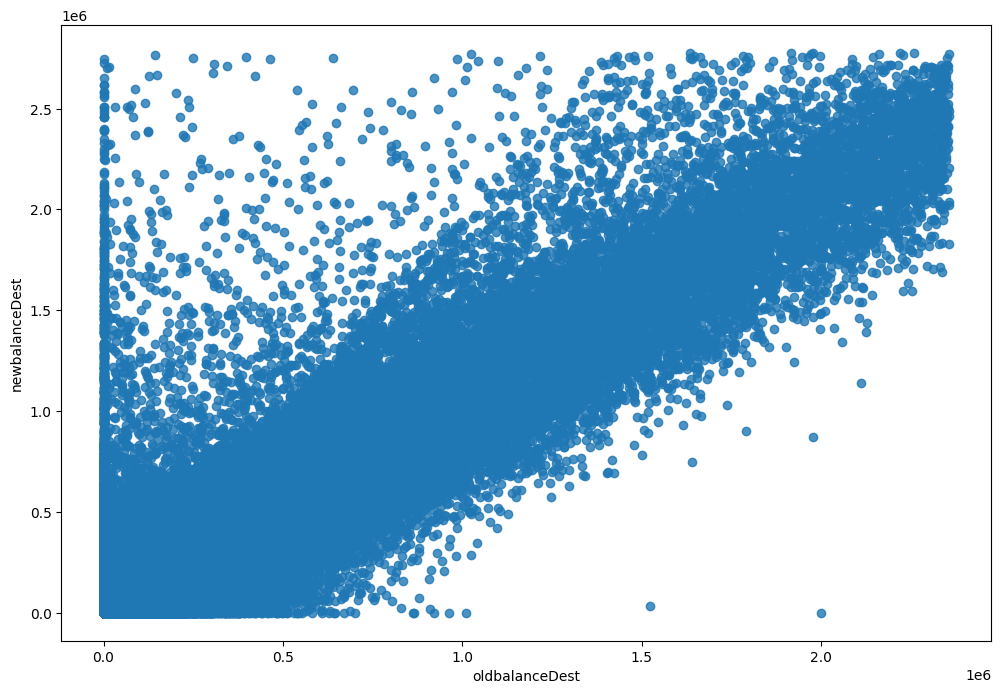

In [103]:
sns.regplot(x='oldbalanceDest',y='newbalanceDest',data=df.sample(100000))

In [ ]:
Performing Min Max Normalization of the features

In [104]:
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

In [105]:
payment_types = pd.get_dummies(df['type'],prefix='type',drop_first=True)
df = pd.concat([df,payment_types],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0,0,False,False,True,False
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0,0,False,False,True,False
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0,False,False,False,True
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0,True,False,False,False
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0,0,False,False,True,False


In [106]:
df.drop('type',axis=1,inplace=True)

In [107]:
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(np.int64)
df['type_DEBIT'] = df['type_DEBIT'].astype(np.int64)
df['type_PAYMENT'] = df['type_PAYMENT'].astype(np.int64)
df['type_TRANSFER'] = df['type_TRANSFER'].astype(np.int64)

In [ ]:
Warning: The target variable of our machine learning models is predominantly imbalanced which may hamper the predictive accuracy of the models as the predictions may be solely made on the basis of the 'majority class', thereby completely neglecting the 'minority class' as a consequence.

In [108]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [109]:
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x,y)

In [ ]:
Model Training and Evaluation

In [110]:
X = x_nm
y = y_nm
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,stratify=y,random_state=2022)

In [111]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [112]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print('ROC AUC Score:',roc_auc_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9219130434782609
F1 Score: 0.9212971078001753
Confusion Matrix:
 [[2673  202]
 [ 247 2628]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2875
           1       0.93      0.91      0.92      2875

    accuracy                           0.92      5750
   macro avg       0.92      0.92      0.92      5750
weighted avg       0.92      0.92      0.92      5750

Accuracy Score: 0.9219130434782609


In [113]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))

Confusion Matrix:
 [[2743  132]
 [   2 2873]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

ROC AUC Score: 0.9766956521739131
F1 Score: 0.9772108843537415
Accuracy Score: 0.9766956521739131


In [116]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [118]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 0.9766956521739131
Confusion Matrix:
 [[2743  132]
 [   2 2873]]
F1 Score: 0.9772108843537415
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.9766956521739131


In [119]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [120]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [121]:
print("ROC AUC Score:",roc_auc_score(y_test,gnb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,gnb_pred))
print("F1 Score:",f1_score(y_test,gnb_pred))
print("Classification Report:\n",classification_report(y_test,gnb_pred))
print("Accuracy Score:",accuracy_score(y_test,gnb_pred))

ROC AUC Score: 0.8478260869565217
Confusion Matrix:
 [[2599  276]
 [ 599 2276]]
F1 Score: 0.8387691173760826
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86      2875
           1       0.89      0.79      0.84      2875

    accuracy                           0.85      5750
   macro avg       0.85      0.85      0.85      5750
weighted avg       0.85      0.85      0.85      5750

Accuracy Score: 0.8478260869565217


In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9914782608695653
Confusion Matrix:
 [[2856   19]
 [  30 2845]]
F1 Score: 0.9914619271650114
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2875
           1       0.99      0.99      0.99      2875

    accuracy                           0.99      5750
   macro avg       0.99      0.99      0.99      5750
weighted avg       0.99      0.99      0.99      5750

Accuracy Score: 0.9914782608695653


In [125]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [126]:
svm_pred = svm.predict(X_test)
svm_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [127]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9761739130434782
Confusion Matrix:
 [[2743  132]
 [   5 2870]]
F1 Score: 0.9766887867959844
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.9761739130434782


In [128]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([1, 0, 1, ..., 0, 0, 0])

In [130]:
print("ROC AUC Score:",roc_auc_score(y_test,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))
print("Accuracy Score:",accuracy_score(y_test,xgb_pred))

ROC AUC Score: 0.976
Confusion Matrix:
 [[2743  132]
 [   6 2869]]
F1 Score: 0.9765146358066713
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.976


In [ ]:
Hyperparameter Tuning using GridSearchCV and RandomizedSearchCV


In [132]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [133]:
grid_search_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.977 total time=   0.3s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.983 total time=   0.3s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.980 total time=   0.3s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.976 total time=   0.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.3s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.978 total time=   1.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.983 total time=   1.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.980 total time=   1.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.977 total time=   1.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.981 total time=   1.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.900 total time=   2.4s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [134]:
grid_search_svm.best_estimator_

SVC(C=10000, gamma=1)

In [135]:
svm = SVC(C=10000,gamma=1)
svm.fit(X_train,y_train)

SVC(C=10000, gamma=1)

In [136]:
svm_pred = svm.predict(X_test)
svm_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9869565217391304
Confusion Matrix:
 [[2844   31]
 [  44 2831]]
F1 Score: 0.9869269653128813
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2875
           1       0.99      0.98      0.99      2875

    accuracy                           0.99      5750
   macro avg       0.99      0.99      0.99      5750
weighted avg       0.99      0.99      0.99      5750

Accuracy Score: 0.9869565217391304


In [138]:
param_grid = {'n_estimators': [100,200,300,400,500],
              'criterion': ['gini','entropy'],
              'class_weight': ['balanced','balanced_subsample']
             }

In [139]:
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)
random_search_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.991 total time=   0.6s
[CV 2/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.992 total time=   0.6s
[CV 3/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.993 total time=   0.6s
[CV 4/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.991 total time=   0.6s
[CV 5/5] END class_weight=balanced, criterion=gini, n_estimators=100;, score=0.992 total time=   0.6s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=400;, score=0.991 total time=   3.5s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=400;, score=0.992 total time=   3.6s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=400;, score=0.993 total time=   3.5s
[CV 4/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=400;, 

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=3)

In [140]:
rfc_pred = random_search_rfc.predict(X_test)
rfc_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [141]:
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("Accuracy Score:",accuracy_score(y_test,rfc_pred))

ROC AUC Score: 0.9766956521739131
Confusion Matrix:
 [[2743  132]
 [   2 2873]]
F1 Score: 0.9772108843537415
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98      2875
           1       0.96      1.00      0.98      2875

    accuracy                           0.98      5750
   macro avg       0.98      0.98      0.98      5750
weighted avg       0.98      0.98      0.98      5750

Accuracy Score: 0.9766956521739131


In [142]:
param_grid = {'C': [1.0,2.0,3.0,4.0,5.0], 
              'solver': ['liblinear','sag','saga'],
              'class_weight': ['balanced']}

In [143]:
random_search_lr = RandomizedSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)
random_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.922 total time=   0.0s
[CV 2/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.930 total time=   0.0s
[CV 3/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.933 total time=   0.0s
[CV 4/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.934 total time=   0.0s
[CV 5/5] END C=2.0, class_weight=balanced, solver=sag;, score=0.920 total time=   0.0s
[CV 1/5] END C=1.0, class_weight=balanced, solver=liblinear;, score=0.921 total time=   0.0s
[CV 2/5] END C=1.0, class_weight=balanced, solver=liblinear;, score=0.929 total time=   0.0s
[CV 3/5] END C=1.0, class_weight=balanced, solver=liblinear;, score=0.932 total time=   0.0s
[CV 4/5] END C=1.0, class_weight=balanced, solver=liblinear;, score=0.934 total time=   0.0s
[CV 5/5] END C=1.0, class_weight=balanced, solver=liblinear;, score=0.920 total time=   0.0s
[CV 1/5] END C=4.0, class_weight=balanc

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                                        'class_weight': ['balanced'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=3)

In [144]:
lr = LogisticRegression(C=5.0,solver='saga',class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=5.0, class_weight='balanced', solver='saga')

In [145]:
lr_pred = lr.predict(X_test)
lr_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [146]:
print("ROC AUC Score:",roc_auc_score(y_test,lr_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,lr_pred))
print("F1 Score:",f1_score(y_test,lr_pred))
print("Classification Report:\n",classification_report(y_test,lr_pred))
print("Accuracy Score:",accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9234782608695653
Confusion Matrix:
 [[2677  198]
 [ 242 2633]]
F1 Score: 0.922888187872415
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2875
           1       0.93      0.92      0.92      2875

    accuracy                           0.92      5750
   macro avg       0.92      0.92      0.92      5750
weighted avg       0.92      0.92      0.92      5750

Accuracy Score: 0.9234782608695652


In [147]:
param_grid = {'criterion': ['gini','entropy'], 'splitter': ['best','random']}

In [148]:
random_search_dtree = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3)
random_search_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.991 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.992 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.991 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.991 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.990 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.987 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.992 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.990 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.990 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.990 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.991 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [149]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [150]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 0.9878260869565216
Confusion Matrix:
 [[2861   14]
 [  56 2819]]
F1 Score: 0.9877365101611774
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2875
           1       1.00      0.98      0.99      2875

    accuracy                           0.99      5750
   macro avg       0.99      0.99      0.99      5750
weighted avg       0.99      0.99      0.99      5750

Accuracy Score: 0.9878260869565217


In [152]:
param_grid = {'n_neighbors': [1,2,3,4,5],
             'weights': ['uniform','distance'],
             'algorithm': ['auto','ball_tree','kd_tree','brute'],
             'p': [1,2]}

In [153]:
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
random_search_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform;, score=0.989 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform;, score=0.991 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform;, score=0.993 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform;, score=0.989 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform;, score=0.993 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.990 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.992 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.990 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=2, p=1, weights=distance;, score=0.989 total time=   0.0s
[CV 5/5] END algorithm=brute, n_ne

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [154]:
knn_pred = random_search_knn.predict(X_test)
knn_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9914782608695653
Confusion Matrix:
 [[2856   19]
 [  30 2845]]
F1 Score: 0.9914619271650114
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2875
           1       0.99      0.99      0.99      2875

    accuracy                           0.99      5750
   macro avg       0.99      0.99      0.99      5750
weighted avg       0.99      0.99      0.99      5750

Accuracy Score: 0.9914782608695653


In [ ]:
Conclusion

In [156]:
print("Performance of ML Models:")
print('Predictive Accuracy of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Predictive Accuracy of K Neighbors Classifier:',str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print('Predictive Accuracy of Support Vector Classifier:',str(np.round(accuracy_score(y_test,svm_pred)*100,2)) + '%')
print('Predictive Accuracy of Decision Tree Classifier:',str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print('Predictive Accuracy of Random Forest Classifier:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Predictive Accuracy of Gaussian Naive Bayes:',str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print('Predictive Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')

Performance of ML Models:
Predictive Accuracy of Logistic Regression: 92.35%
Predictive Accuracy of K Neighbors Classifier: 99.15%
Predictive Accuracy of Support Vector Classifier: 98.7%
Predictive Accuracy of Decision Tree Classifier: 98.78%
Predictive Accuracy of Random Forest Classifier: 97.67%
Predictive Accuracy of Gaussian Naive Bayes: 84.78%
Predictive Accuracy of XGBoost Classifier: 97.6%


In [ ]:
K Nearest Neighbors Classifier is the best performing model with a prediction accuracy of a little more than 99%

In [ ]:
Gaussian Naive Bayes is the worst performing model having the least prediction accuracy of just 84.78%

In [ ]:
QUESTIONS
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

In [ ]:
ANSWERS:

Ans 1 - 
Dataset have high multicollinearity.
Selected features have not much outliers, So I avoid the outliers.
    
Ans 2 - 
My Fraud detection model based on machine learning leverage the power of algorithms to identify and flag suspicious activities or fraudulent patterns within datasets
Steps or Methodology used:
I confirmed that there were no null values in the data
I checked the multicollinearity and removing it through dropping columns as it may affect the accuracy of the model.
Then, identified the outliers through some box plots under conditions and then eliminated the outliers
Performed Exploratory Data Analysis on the given dataset
Found out the maximum transferred amount by type and then plotted them on a bar graph
Again, I dropped an unneccessary column
Then, I did model training and evaluation
I used:
Logistic Regression
Random Forest Classifier
Decision Tree
Gaussian Naive Bayes
K-Nearest Neighbors Classifier
SVM
XGBoost
through Precision, Recall, F1-Score, and Accuracy
Then hypertuned the hyper-parameters through GridSearchCV and RandomizedSearchCV
Then, I created the classification report by using the Confusion Matrix
I found out that the K-Nearest Neighbors Classifier method gave the maximum accuracy and the Gaussian Naive Bayes method was the worst performer.
                               
Ans 3 - 
I dropped the unnecessary columns which does not give any information for model building and also dropped those columns which have high VarianceInfluenceFactor (VIF). Left four columns ('type', 'amount', 'isFraud', 'isFlaggedFraud') are selected for model building.

Ans 4 - 
I have provided various metrics like accuracy, precision, recall, f1_score and confusion matrix which are demonstrate the overall performance of the model.

Ans 5 - 
That is the four ('type', 'amount', 'isFraud', 'isFlaggedFraud') most important key factors which predict the fraudulent customer.

Ans 6 - 
Yes, Because these key factors hold the actual and sufficient information for any fraudulent transaction.

Ans 7 -                                                                 
When a company updates its infrastructure in the field of data science, it is important to take preventative measures to minimize disruptions. This includes having a backup and recovery strategy in place to safeguard data, setting up test environments to thoroughly test updates, documenting the existing infrastructure, and communicating the update plan to stakeholders. Incremental updates and rollback plans are advisable to mitigate risks, and rigorous testing and validation help ensure the updated infrastructure performs as expected

Ans 8 -
Firstly, closely monitor the system's performance by tracking metrics such as response time, resource utilization, and error rates. Comparing these metrics with pre-update benchmarks can provide insights into the system's improved performance or identify any potential issues. Secondly, gather user feedback to gauge their experience with the updated infrastructure. Conduct surveys or interviews to understand if users find the system more reliable, efficient, and user-friendly. Additionally, measure the impact on productivity and efficiency by analyzing key performance indicators, such as data processing time or model training time.